# Derivatives and Gradient Descent

The intent of this project is to understand how *derivatives* are applied into the process to optimize *cost functions*: **Gradient descent**

### a) Import Dataset

In [177]:
# First of all we import all the requiered libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [178]:
data = pd.read_csv('Real_Estate.csv')

In [179]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [180]:
data.shape

(511, 14)

The dataset concerns housing values in suburbs of Boston.

Attribute Information:

1. CRIM per capita crime rate by town
2. ZN proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX nitric oxides concentration (parts per 10 million)
6. RM average number of rooms per dwelling
7. AGE proportion of owner-occupied units built prior to 1940
8. DIS weighted distances to five Boston employment centres
9. RAD index of accessibility to radial highways
10. TAX full-value property-tax rate per 10,000 USD
11. PTRATIO pupil-teacher ratio by town
12. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13 LSTAT % lower status of the population
14. MEDV Median value of owner-occupied homes in USD 1000's

Missing Attribute Values: None.

We can implement linear regression with one variable (RM average number of rooms per dwelling) to predict Median value of owner-occuped homes MEDV. We calculate the *cost function* and finally optimize the parameters through *gradient descent*

In [181]:
# x= RM y= MEDV
#we have to reshape because sklearn expect a 2D array and not a 1D (-1 into reshape indicate all the rows)

x,y= data['RM'],data['MEDV']

### b) Plotting the data

Before starting, it is useful to understand the data by visualizing it. Since we only use 2 variables, we can use the scatter plot.

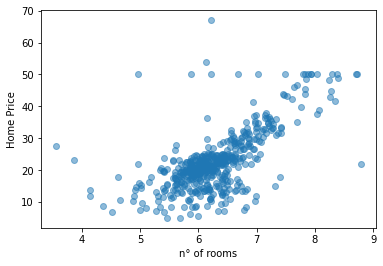

In [182]:
fig = plt.figure()
plt.scatter(x,y,alpha=0.5)
plt.ylabel('Home Price')
plt.xlabel('n° of rooms');

Visually we can see that exist a positive relationship between price and number of rooms

### c) Cost function

The *loss* is a value that indicate how badly or good the model performs: if it is zero, the estimation is perfect. When The loss increases, the prediction is less good.

The error of the model is the distance between the data points and the estimated values. A common measure used to calculate that distance is the *Euclidean distance* which corresponds to the *squared loss*. Averaging this loss across all data samples, you get the *Mean squared error MSE*:
$$L = (\hat{y}-y)^2$$
With $\hat{y}$ being the estimated value and  $y$ the true value

In the case of linear regression, the predicted value $y$ is calculated with a linear function:

$$\hat{y} = ax + b$$

if we replace $\hat{y}$ you get:

$$L = ((ax + b)-y)^2$$

We'll simplify the model and use only one parameter: the slope paramenter $a$ so we force the line to pass through zero (b=0). Furthermore, conventionally the model parameters are indicated with "theta" symbol:

$$L = (\theta x-y)^2$$

Mathematically, the cost function is written as:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m ( \theta x^{(i)} - y^{(i)})^2$$

with $m$ being the number of training examples

dividing by 2m instead of m is done only to simplify the final result of the cost function derivative during the gradient descent step.

In [183]:
def MSE(x,y,theta):
    m = y.shape[0]
    cost = (1/(2*m)) * np.sum((theta * x - y)**2)
    return cost

In [184]:
MSE(x,y,0)

300.17863013698627

In [185]:
# We calculate the MSE for some theta parameter values
t = []
MSE_ = []
for thetas in np.arange(-5,12,1):
    t.append(thetas)
    MSE_.append(MSE(x,y,thetas))

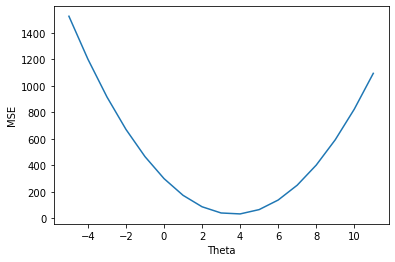

In [186]:
fig = plt.figure()
plt.plot(t,MSE_)
plt.ylabel('MSE')
plt.xlabel('Theta');

From the plot we can observe how the cost functon decrease as the theta increase since the value if about 4 and then start to increase again. So we can conclude that the Cost function is minimized around theta = 4. However with gradient descent we avaid to calculate the cost for every theta parameter.

### d) Derivative of the Cost Function

Since the derivative of a function correspond to its slope, we can use the derivative of a cost function to have an indication about the direction of the theta parameter to minimize the functon (when slope = 0).

So we proceed to the calculation of the derivative of the cost function:

$$ \frac{dJ(\theta)}{d\theta} = \frac{d}{d\theta}(\frac{1}{2m} \sum_{i=1}^m ( \theta x^{(i)} - y^{(i)})^2)$$

First we can get 1/2m out from the derivative because of the multiplication by constant rule:

$$ \frac{dJ(\theta)}{d\theta} = \frac{1}{2m}\sum_{i=1}^m \frac{d}{d\theta}(( \theta x^{(i)} - y^{(i)})^2)$$

Now we can use the chain rule: $$ (f(g))' = f'(g) \cdot g' $$

$$ g(\theta)= \theta x - y $$

$$ f(g)=g^2 $$

so we have:

$$ g'(\theta)= x $$

$$ f'(g)=2g $$

$$ (f(g))' = 2g \cdot x = 2(\theta x - y) \cdot x $$

So the derivative of the MSE cost function is:

$$ \frac{dJ(\theta)}{d\theta} = \frac{1}{2m}\sum_{i=1}^m 2( \theta x^{(i)} - y^{(i)}) \cdot x^{(i)}$$

$$ = \frac{1}{m}\sum_{i=1}^m( \theta x^{(i)} - y^{(i)}) \cdot x^{(i)}$$

The function returns the slope of the tangent of the cost function for the value of $\theta$. The slope tells you the direction that you must take to minimize the cost. If the derivative is negative you have to increase $\theta$, if the slope is positive, the parameter $\theta$ has to be reduced to minimize MSE function.

In [187]:
def MSE_derivative(x,y,theta):
    m = y.shape[0]
    deriv = (1/m) * np.sum((theta*x - y) * x)
    return deriv

In [188]:
print('MSE:',MSE(x,y,theta=0))
print('MSE derivative:',MSE_derivative(x,y,theta=0))

MSE: 300.17863013698627
MSE derivative: -145.8269338551859


We see that de slope of the cost function for $\theta$ = 0 is negative so we have to increase $\theta$ to minimize the MSE function

### e) Implementing Gradient Descent

Now that we have calculated the cost functon derivative, we can proceed to optimize $\theta$

Steps:

- Start with $\theta=0$
- Calculate the cost function derivative for $\theta=0$
- Update $\theta$ in the direction that decrease the cost.

So now we proceed with the last step: **Parameter Update**

A large derivative value means that the slope is steep. In this case, you want to add or substract a large value to approach minimum rapidly. *learning rate* $\alpha$ is applied to the derivative to calibrate how large are the steps done at each interation.

In [189]:
print('MSE:',MSE(x,y,theta=0))
print('MSE derivative:',MSE_derivative(x,y,theta=0))

MSE: 300.17863013698627
MSE derivative: -145.8269338551859


In [190]:
alpha = 0.01
theta = 0
theta = theta - alpha * MSE_derivative(x,y,theta)
theta

1.458269338551859

As expected, because the derivative is negative, the theta has increased. Now proceed with a iteration process to optimize the paramenter

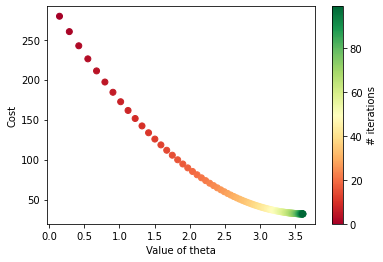

In [191]:
alpha = 0.001
theta = 0
iterations = 100

thetas = []
costs = []

for i in range(iterations):
    theta = theta - alpha * MSE_derivative(x,y,theta)
    cost = MSE(x,y,theta)
    
    thetas.append(theta)
    costs.append(cost)

plt.scatter(thetas,costs,c=np.arange(len(costs)),cmap='RdYlGn')
clrbar=plt.colorbar()
clrbar.set_label('# iterations')
plt.ylabel('Cost')
plt.xlabel('Value of theta');

From the plot we can observe that as the value of theta approaches its optimal value the width of the step become smaller. this happen because the derivative of cost functon approximate zero and the new theta value is very close to the previous one.

### f) Compute the best linear regression line

In [192]:
best_theta = thetas[-1]
best_theta

3.6146474794876857

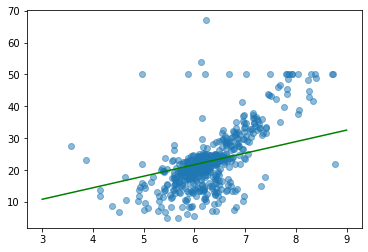

In [193]:
x_lr = np.arange(3,10,1)
y_lr = best_theta*x_lr
plt.scatter(x,y,alpha=0.5)
plt.plot(x_lr,y_lr,c='g')

In [194]:
MSE(x,y,best_theta)

32.004301677600196

### f) Gradient Descent with 2 parameters

With 2 parameters the cost function become:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m ( \theta_0 + \theta_1 x^{(i)} - y^{(i)})^2$$

we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.

In [195]:
m = y.shape[0]
x = np.stack([np.ones(m),x],axis=1)

In [212]:
def computeCost(x,y,theta):
    m = y.size
    J = (1/(2*m)) * np.sum(np.square((theta[0]*x[:,0]+theta[1]*x[:,1])-y))
    return J

In [271]:
computeCost(x,y,[0,0])

300.17863013698627

With 2 parameters we have 2 partial derivatives:

$$ \frac{dJ(\theta)}{d\theta_0} = \frac{1}{2m}\sum_{i=1}^m \frac{d}{d\theta_0}(( \theta_0 + \theta_1 x^{(i)} - y^{(i)})^2)= \frac{1}{m}\sum_{i=1}^m( \theta_0 + \theta_1 x^{(i)} - y^{(i)})$$

$$ \frac{dJ(\theta)}{d\theta_1} = \frac{1}{2m}\sum_{i=1}^m \frac{d}{d\theta_1}(( \theta_0 + \theta_1 x^{(i)} - y^{(i)})^2)= \frac{1}{m}\sum_{i=1}^m( \theta_0 + \theta_1 x^{(i)} - y^{(i)}) \cdot x^{(i)}$$

The parameters have to be updated simultaneously

In [216]:
def gradientDescent(x, y, theta, alpha, num_iters):
    
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        
        temp0 =theta[0] - (alpha * 1/m *np.sum((theta[0]*x[:,0]+theta[1]*x[:,1])-y))
        temp1 =theta[1] - (alpha * 1/m *np.sum(((theta[0]*x[:,0]+theta[1]*x[:,1])-y)*x[:,1]))
        
        theta = np.array([temp0,temp1])
        J = computeCost(x, y, theta)
        
        J_history.append(J)
        
    return theta,J_history

In [274]:
alpha = 0.03
theta = np.zeros(2)
iterations = 10000
opt_theta, J_history=gradientDescent(x,y,theta,alpha,iterations)

In [275]:
opt_theta

array([-33.11361858,   8.88052689])

Because we have 2 parameters and the cost function result we can plot only with a 3D surface graph. Furthermore we use the contour plot to graph the optimization parameters.

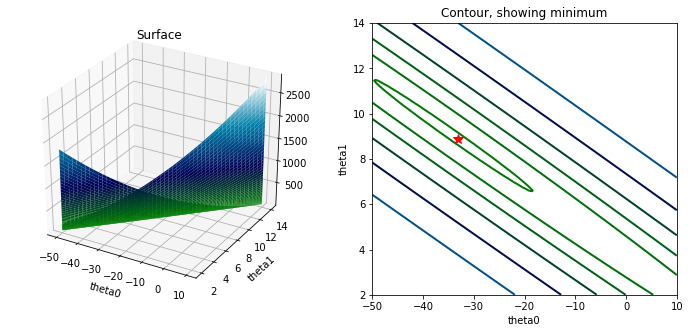

In [289]:
#grid over which we will calculate J
theta0_vals = np.linspace(-50, 10, 100)
theta1_vals = np.linspace(2, 14, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(x, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='ocean')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='ocean', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(opt_theta[0], opt_theta[1], 'r*', ms=10, lw=2)
plt.title('Contour, showing minimum');

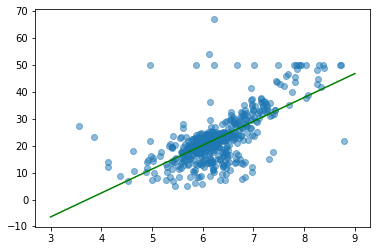

In [277]:
x_lr = np.arange(3,10,1)
y_lr = opt_theta[0] + opt_theta[1]*x_lr
plt.scatter(x[:,1],y,alpha=0.5)
plt.plot(x_lr,y_lr,c='g')

In [278]:
J_history[-1]

24.826467836617933

We can see that the error is lesser using 2 parameters than using only one and the regression line fitting better the data.